<p style="text-align:center">
PSY 381D <b>Brain Connectivity</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Small-world networks</b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 4, 2019</b></p>

<hr style="height:5px;border:none" />

# Network data
<hr style="height:1px;border:none" />

We will be examining these network data for today's exercises. They are available in the **`DataSmallWorld`** directory.
* C. Elegans neural network (`CElegans.adjlist`)
* Power grid (`power.gml`)
* Brain network (resting-state fMRI)
   * ROI network (`Oxford_sub16112_aal90_d5.adjlist`)
   * Voxel network (`Oxford_sub16112_voxel_d20.adjlist`)

`<NetworkSize.py>`

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

##### loading the network data
# C Elegans neural network
G_CEleg = nx.read_adjlist('DataSmallWorld/CElegans.adjlist')
# Power grid
G_Power = nx.read_gml('DataSmallWorld/power.gml', label='id')
# Brain (ROI)
G_ROI = nx.read_adjlist('DataSmallWorld/Oxford_sub16112_aal90_d5.adjlist')
# Brain (Voxel)
G_Voxel = nx.read_adjlist('DataSmallWorld/Oxford_sub16112_voxel_d20.adjlist')


   
### Exercise
**Number of nodes & edges**: Find the missing numbers in the table below, by determining the number of nodes or edges, or the average degree (2 $\times$ number of edges divided by the number of nodes). ***Post the numbers on Canvas.***

<table>
<tr>
<th style="text-align:left">Network</th>
<th style="text-align:center">Number of nodes</th>
<th style="text-align:center">Number of edges</th>
<th style="text-align:center">Average degree</th>
</tr>
<tr>
<td style="text-align:left">C. Elegans</td>
<td style="text-align:center">297</td>
<td style="text-align:center">2148</td>
<td style="text-align:center"><b>(a)</b></td>
</tr>
<tr>
<td style="text-align:left">Power grid</td>
<td style="text-align:center"><b>(b)</b></td>
<td style="text-align:center">6594</td>
<td style="text-align:center">2.7</td>
</tr>
<tr>
<td style="text-align:left">Brain (ROI)</td>
<td style="text-align:center">90</td>
<td style="text-align:center"><b>(c)</b></td>
<td style="text-align:center"><b>(d)</b></td>
</tr>
<tr>
<td style="text-align:left">Brain (Voxel)</td>
<td style="text-align:center"><b>(e)</b></td>
<td style="text-align:center">295219</td>
<td style="text-align:center">30.7</td>
</tr>
</table>

# Clustering coefficient
<hr style="height:1px;border:none" />

The **clustering coefficient** of a network can be calculated by the **`average_clustering`** function.

`<ClusteringCoefficient.py>`

In [2]:
##### Clustering coefficients
print('Clustering coefficients')
print('C. Elegans: %4.2f' % nx.average_clustering(G_CEleg))
print('Power grid: %5.3f' % nx.average_clustering(G_Power))
print('Brain (ROI): %4.2f' % nx.average_clustering(G_ROI))
print('Brain (Voxel): %4.2f' % nx.average_clustering(G_Voxel))

Clustering coefficients
C. Elegans: 0.29
Power grid: 0.080
Brain (ROI): 0.51
Brain (Voxel): 0.27


# Path length
<hr style="height:1px;border:none" />

The average shortest path length (or simply referred as **path length**) of a network can be calculated by the **`average_shortest_path_length`** function. *Calculation of path length is computationally very demanding, especially for a large network or a densely connected network*. 

`<PathLength.py>`

In [3]:
##### Path Length
print('Average shortest path lengths')
print('C. Elegans: %4.2f' % nx.average_shortest_path_length(G_CEleg))
print('Power grid: %4.2f' % nx.average_shortest_path_length(G_Power))
print('Brain (ROI): %4.2f' % nx.average_shortest_path_length(G_ROI))
print('Brain (Voxel): %4.2f' % nx.average_shortest_path_length(G_Voxel))

Average shortest path lengths
C. Elegans: 2.46
Power grid: 18.99


NetworkXError: Graph is not connected.

You see an error. This is because the brain network (ROI) is not **connected**. (**Connected:** all nodes are connected to a single network without any disconnected component). Path length cannot be calculated if some nodes cannot be reached from some other nodes due to disconnection. 

We can check the connected component sizes using **`connected_components`** function.

In [4]:
#### Checking the connected components
ccSize_ROI = [len(c) for c in sorted(nx.connected_components(G_ROI),
                                     key=len,
                                     reverse=True)]
print('Brain (ROI), connected component sizes: ', ccSize_ROI)

Brain (ROI), connected component sizes:  [89, 1]


In [ ]:
ccSize_Voxel = [len(c) for c in sorted(nx.connected_components(G_Voxel),
                                       key=len,
                                       reverse=True)]
print('Brain (Voxel), connected component sizes: ', ccSize_Voxel)

We can calculate the path length on the largest connected component (a.k.a., **giant component**) only.

In [6]:
##### Path length, giant component only
GC_nodes_ROI = max(nx.connected_components(G_ROI), key=len)  # nodes in giant component
GC_ROI = G_ROI.subgraph(GC_nodes_ROI)  # nodes & edges in giant component

The network **`GC_ROI`** only contains nodes and edges in the giant component.

In [7]:
len(GC_ROI.nodes())

89

In [8]:
len(GC_ROI.edges())

279

In [9]:
print('Path length, brain (ROI): %4.2f'  % nx.average_shortest_path_length(GC_ROI))

Path length, brain (ROI): 3.76


### Exercise
**Path length, brain (voxel) network**: Calculate the number of nodes and edges, as well as the path length of the giant component of the brain (voxel) network. ***Post the numbers on Canvas.***

# Standardized clustering coefficient and path length
<hr style="height:1px;border:none" />

You may notice by now that the magnitude of clustering coefficients C and path lengths L varies tremendously for different networks. To determine whether a network exhibits *small-world* characteristics, it is necessary to compare C and L against that obtained from an equivalent random network (with the same number of nodes, edges, and degree sequence).

## Random network with a given degree sequence
It is important to compare C and L from a network of interest to an equivalent random network with matching nodes, edges, and degree sequence. This is to rule out any difference between the two networks due to the difference in the availability of nodes / edges and how they are connected. In other words, we want to compare an apple with another apple (an apple lacking the organization principle).

We can generate an equivalent random network by degree-preserving re-wiring (Maslov & Sneppen, Science 2002). The goal is to rewire connections randomly in a way that it preserves degrees at nodes but destroys any underlying structure.

<img style="width: 600px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/SmallWorld_Rewire.jpg?raw=true" alt="Schematic of degree preserving re-wiring"/>

I have written a few functions to implement this. We will re-wire (10 $\times$ number of nodes) times just so that any underlying network organization is disrupted, except node degrees.

`<RandomNetworkModel.py>`

In [17]:
import random

def pick_4nodes(G):
    a = random.choice(list(G.nodes()))  # a random node
    b = random.choice(list(G[a]))       # a random node connected to a
    while True:
        # potential pool of nodes to draw c
        cPool = (set(G.nodes())-set(G[a])).intersection(set(G.nodes())-set(G[b]))
        c = random.choice(list(cPool))
        # potential pool of nodes to draw d
        dPool = (set(G[c])-set(G[a])).intersection(set(G[c])-set(G[b]))
        if len(dPool)>0:
            d = random.choice(list(dPool))
            break
    return [a,b,c,d]


def rewire_multi(G,nIter):
    H = G.copy()
    for i in range(nIter):
        list4nodes = pick_4nodes(H)
        H.remove_edge(list4nodes[0],list4nodes[1])
        H.remove_edge(list4nodes[2],list4nodes[3])
        H.add_edge(list4nodes[0],list4nodes[2])
        H.add_edge(list4nodes[1],list4nodes[3])
    return H


As a demonstration, let's create a re-wired equivalent random network for C. Elegans network. Here are the degree sequence before and after rewiring.

In [3]:
%matplotlib inline

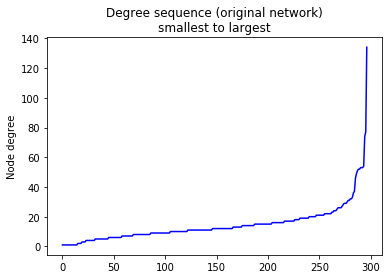

In [18]:
##### C. Elegan network degee sequence before re-wiring
degree_CEleg = [d for n, d in G_CEleg.degree()]
degree_CEleg.sort()
plt.plot(degree_CEleg,'b-')
plt.ylabel('Node degree')
plt.title('Degree sequence (original network)\nsmallest to largest')
plt.show()

In [19]:
##### Rewiring C. Elegans network
H_CEleg = rewire_multi(G_CEleg,10*len(G_CEleg.nodes()))

Note that we are re-wiring 10 times the number of nodes.

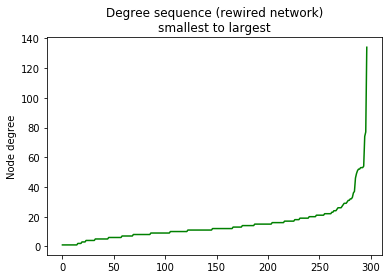

In [20]:
##### C. Elegan network degee sequence after re-wiring
degree_CEleg_rewire = [d for n, d in H_CEleg.degree()]
degree_CEleg_rewire.sort()
plt.plot(degree_CEleg_rewire,'g-')
plt.ylabel('Node degree')
plt.title('Degree sequence (rewired network)\nsmallest to largest')
plt.show()

## Standardized clustering coefficient

Let's see how clustering coefficient changes after rewiring.

In [21]:
##### Clustering coeff, before and after rewiring
print('Clustering, before: %6.4f' % nx.average_clustering(G_CEleg))
print('Clustering, after: %6.4f' % nx.average_clustering(H_CEleg))

Clustering, before: 0.2924
Clustering, after: 0.1456


So the ratio of the clustering coefficient from the original network $C$ compared to the clustering coefficient of the random network $C_{rand}$, $\gamma=C/C_{rand}$ is 2.0. ***If a network exhibits small-world properties, $\gamma>>1$ due to local interconnections or cliquishness that exists in the network.***

### Exercise
**Clustering coefficient, rewired networks**: Calculate the clustering coefficient of rewired **(a)** power grid, and **(b)** brain network (ROI, giant component only). **Post the resulting numbers on Canvas**.

## Standardized path length

As for calculation of the path length, we need to be aware that the rewiring process may not produce a connected network. So we shall use the path length of the giant component only, with this modified function.

In [22]:
def path_length_gc(G):
    GC_nodes = max(nx.connected_components(G), key=len)  # giant component nodes
    GC = G.subgraph(GC_nodes)
    L = nx.average_shortest_path_length(GC)
    return L

Using this function, now let's take a look if rewiring change the path length at all.

In [23]:
##### Path length, before and after rewiring
print('Path length, before: %4.2f' % path_length_gc(G_CEleg))
print('Path length, after: %4.2f' % path_length_gc(H_CEleg))

Path length, before: 2.46
Path length, after: 2.41


So the ratio of the path length before ($L$) and after rewiring ($L_{rand}$), $\lambda=L/L_{rand}$ is 1.0. ***If a network exhibits small-world properties, $\lambda\simeq1$ due to the shortened global separation in the network.***


### Exercise
**Path length, rewired networks**: Calculate the clustering coefficient of rewired **(a)** power grid, and **(b)** brain network (ROI, giant component only). **Post the resulting numbers on Canvas**.

# Small-worldness
<hr style="height:1px;border:none" />

If a network is small-world, $\gamma>>1$ and $\lambda\simeq1$. Thus, Humphries et al. (Humphries et al., PLoS ONE, 2008) developed a metric called small-worldness $\sigma$ defined as
$$
\sigma = \frac{C/C_{rand}}{L/L_{rand}} = \frac{\gamma}{\lambda}
$$

Humphries suggests ***any network with $\sigma>1$ is a small-world network***. This concept of small-worldness $\sigma$ is widely adapted by brain network researchers. However, some question the utility of the small-worldness $\sigma$ (e.g., Telesford et al., Brain Connectivity 2011) because virtually all networks have $\sigma>1$.

# *Further readings*
<hr style="height:1px;border:none" />

* Humphries MD, Gurney K. 2008. Network 'small-world-ness': a quantitative method for determining canonical network equivalence. PLoS One 3:e0002051.
* Telesford QK, Joyce KE, Hayasaka S, Burdette JH, Laurienti PJ (2011) The ubiquity of small-world networks. Brain Connectivity 1: 367–375.